# 使用PIL查看图像的EXIF信息

In [23]:
from PIL import Image

demo_path = "datasets/cat_dataset/images/IMG_20211020_091507.jpg"
demo_image = Image.open(demo_path)

In [28]:
print(type(demo_image.getexif()))
print(demo_image.getexif())

for k, v in demo_image.getexif().items():
    print("Tag", k, "Value", v)  # Tag 274 Value 2

<class 'PIL.Image.Exif'>
{274: 6}
Tag 274 Value 6


In [32]:
from PIL import ExifTags
for k,v in ExifTags.TAGS.items():
    print(f"Tag:{k}, Value:{v}")

Tag:1, Value:InteropIndex
Tag:11, Value:ProcessingSoftware
Tag:254, Value:NewSubfileType
Tag:255, Value:SubfileType
Tag:256, Value:ImageWidth
Tag:257, Value:ImageLength
Tag:258, Value:BitsPerSample
Tag:259, Value:Compression
Tag:262, Value:PhotometricInterpretation
Tag:263, Value:Thresholding
Tag:264, Value:CellWidth
Tag:265, Value:CellLength
Tag:266, Value:FillOrder
Tag:269, Value:DocumentName
Tag:270, Value:ImageDescription
Tag:271, Value:Make
Tag:272, Value:Model
Tag:273, Value:StripOffsets
Tag:274, Value:Orientation
Tag:277, Value:SamplesPerPixel
Tag:278, Value:RowsPerStrip
Tag:279, Value:StripByteCounts
Tag:280, Value:MinSampleValue
Tag:281, Value:MaxSampleValue
Tag:282, Value:XResolution
Tag:283, Value:YResolution
Tag:284, Value:PlanarConfiguration
Tag:285, Value:PageName
Tag:288, Value:FreeOffsets
Tag:289, Value:FreeByteCounts
Tag:290, Value:GrayResponseUnit
Tag:291, Value:GrayResponseCurve
Tag:292, Value:T4Options
Tag:293, Value:T6Options
Tag:296, Value:ResolutionUnit
Tag:297, 

# PIL旋转图像

In [35]:
import matplotlib.pyplot as plt

## 简洁方式

In [34]:
!pip show Pillow

Name: Pillow
Version: 8.3.2
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: /Users/huangshan/Documents/software/miniconda3/miniconda3/envs/py37/lib/python3.7/site-packages
Requires: 
Required-by: torchvision, scikit-image, matplotlib, ipympl, imageio


(-0.5, 2999.5, 3999.5, -0.5)

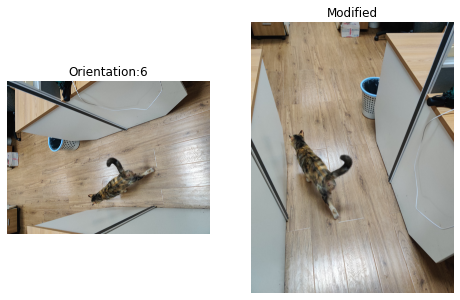

In [40]:
from PIL import ImageOps,Image

demo_path = "datasets/cat_dataset/images/IMG_20211020_091507.jpg"
demo_image = Image.open(demo_path)

image = ImageOps.exif_transpose(demo_image)

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title(f"Orientation:{demo_image.getexif()[274]}")
plt.imshow(demo_image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Modified")
plt.imshow(image)
plt.axis("off")

## 原始方式

In [45]:
def apply_exif_orientation(image):
    _EXIF_ORIENT =274
    if not hasattr(image,'getexif'):
        return image
    try:
        exif = image.getexif()
    except Exception:
        exif=None
        return image
    orientation = exif.get(_EXIF_ORIENT)
    method = {2:Image.FLIP_LEFT_RIGHT,
            3:Image.ROTATE_180,
            4:Image.FLIP_TOP_BOTTOM,
            5:Image.TRANSPOSE,
            6:Image.ROTATE_270,
            7:Image.TRANSVERSE,
            8:Image.ROTATE_90}.get(orientation)
    if method is not None:
        return image.transpose(method)
    return image

(-0.5, 2999.5, 3999.5, -0.5)

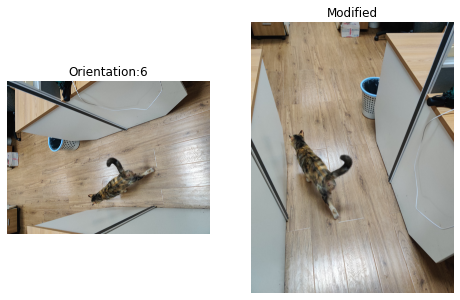

In [46]:
demo_path = "datasets/cat_dataset/images/IMG_20211020_091507.jpg"
demo_image = Image.open(demo_path)

image = apply_exif_orientation(demo_image)

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title(f"Orientation:{demo_image.getexif()[274]}")
plt.imshow(demo_image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Modified")
plt.imshow(image)
plt.axis("off")

根据：[Image.rotate(angle, resample=Resampling.NEAREST, expand=0, center=None, translate=None, fillcolor=None)](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.rotate)可知：
+ Image这个库旋转使用的是逆时针的角度。。。
+ **angle** – In degrees counter clockwise.

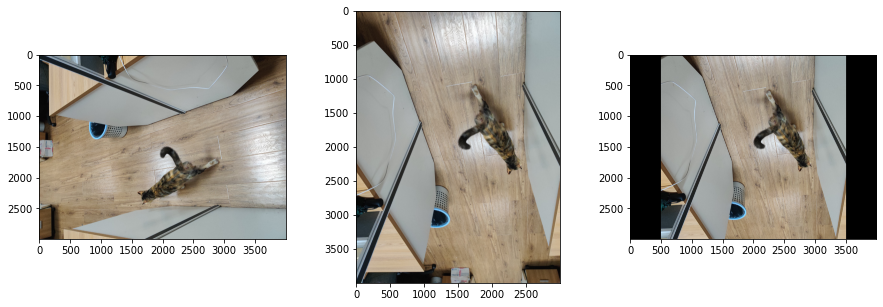

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(demo_image)
plt.subplot(1,3,2)
plt.imshow(demo_image.transpose(Image.ROTATE_90))
plt.subplot(1,3,3)
plt.imshow(demo_image.rotate(90))

# OpenCV显示图像（EXIF）

默认opencv在读取图像时已经应用了EXIF信息

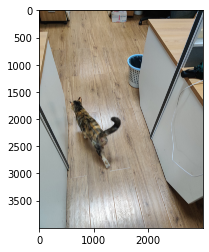

In [72]:
import cv2
demo_path = "datasets/cat_dataset/images/IMG_20211020_091507.jpg"

demo_image = cv2.imread(demo_path)
plt.imshow(demo_image[:,:,::-1])

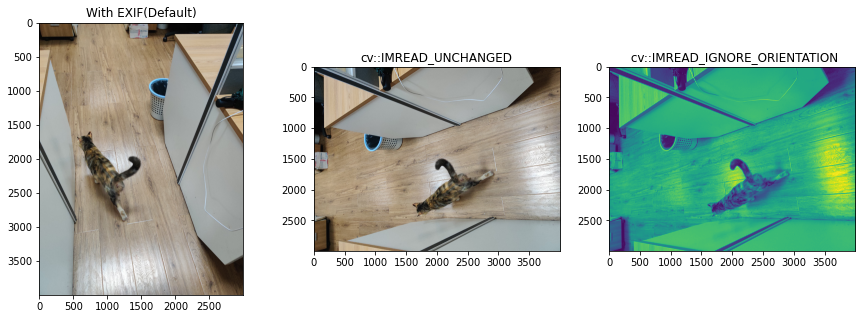

In [71]:
import cv2
demo_path = "datasets/cat_dataset/images/IMG_20211020_091507.jpg"

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
demo_image = cv2.imread(demo_path)
plt.title("With EXIF(Default)")
plt.imshow(demo_image[:,:,::-1])

plt.subplot(1,3,2)
withOut_image_1 = cv2.imread(demo_path,-1)
plt.title("cv::IMREAD_UNCHANGED")
plt.imshow(withOut_image_1[:,:,::-1])

plt.subplot(1,3,3)
withOut_image_2 = cv2.imread(demo_path,128)
plt.title(" cv::IMREAD_IGNORE_ORIENTATION")
plt.imshow(withOut_image_2)

如果有些场合需要不使用EXIF信息，可以

# 草稿

In [14]:
from pycocotools.coco import COCO
import numpy as np
import os
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

def apply_exif_orientation(image):
    _EXIF_ORIENT =274
    if not hasattr(image,'getexif'):
        return image
    try:
        exif = image.getexif()
    except Exception:
        exif=None
        return image
    orientation = exif.get(_EXIF_ORIENT)
    method = {2:Image.FLIP_LEFT_RIGHT,
            3:Image.ROTATE_180,
            4:Image.FLIP_TOP_BOTTOM,
            5:Image.TRANSPOSE,
            6:Image.ROTATE_270,
            7:Image.TRANSVERSE,
            8:Image.ROTATE_90}.get(orientation)
    if method is not None:
        return image.transpose(method)
    return image

def show_bbox_only(coco,anns,show_label_bbox=True,is_filling=True):
    """Show bounding box of annotation Only"""
    if(len(anns)==0):
        return
    ax =plt.gca()
    ax.set_autoscale_on(False)

    image2color = dict()
    for cat in coco.getCatIds():
        image2color[cat]=(np.random.random((1,3))*0.7+0.3).tolist()[0]

    polygons=[]
    colors=[]

    for ann in anns:
        color = image2color[ann['category_id']]
        bbox_x,bbox_y,bbox_w,bbow_h = ann['bbox']
        # 构成多边形的顺时针
        # poly = [[bbox_x,bbox_y],[bbox_x+bbox_w,bbox_y],[bbox_x+bbox_w,bbox_y+bbow_h],[bbox_x,bbox_y+bbow_h]]
        # 逆时针
        poly = [[bbox_x,bbox_y],[bbox_x,bbox_y+bbow_h],[bbox_x+bbox_w,bbox_y+bbow_h],[bbox_x+bbox_w,bbox_y]]
        polygons.append(Polygon(np.array(poly).reshape((4,2))))
        colors.append(color)
        if show_label_bbox:
            label_box = dict(facecolor=color)
        else:
            label_box = None
    ax.text(bbox_x,bbox_y,f"{coco.loadCats(ann['category_id'])[0]['name']}",color='white',bbox=label_box)
    if is_filling:
        p=PatchCollection(polygons,facecolor=colors,linewidth=0,alpha=0.4)
        ax.add_collection(p)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


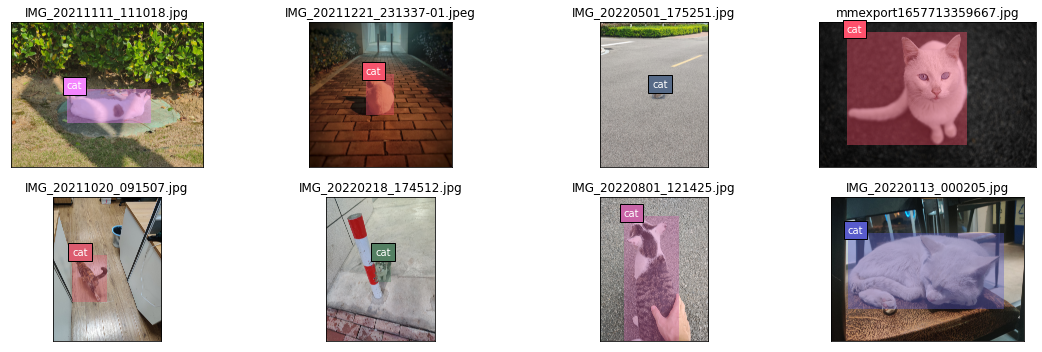

In [22]:
import os
import matplotlib.pyplot as plt
from PIL import Image

json_base_path = 'datasets/cat_dataset/annotations'
coco = COCO(os.path.join(json_base_path,'test.json'))
image_ids=coco.getImgIds()
# np.random.shuffle(image_ids)

plt.figure(figsize=(16,5))
for i in range(8):
    image_data=coco.loadImgs(image_ids[i])[0]
    image_file_path = os.path.join("datasets/cat_dataset/images",image_data["file_name"])
    # print(image_file_path)
    annotation_ids = coco.getAnnIds(imgIds=image_data['id'],catIds=[],iscrowd=0)
    # print(f"image_data['id'] = {image_data['id']}, image_ids[i] ={image_ids[i]}")
    annotation = coco.loadAnns(annotation_ids)

    ax=plt.subplot(2,4,i+1)
    image = Image.open(image_file_path).convert('RGB')

    # 这行代码很关键，否则可能图像和标签对不上
    image = apply_exif_orientation(image)
    # PIL读取的图像，有可能meta信息和图像的高宽是不对应的，用opencv读取就没有这个问题
    ax.imshow(image)
    show_bbox_only(coco,annotation)
    plt.title(image_data["file_name"])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
# plt.savefig("withExif.pdf",dpi=800)

关于保存图像，
+ <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html>
+ <https://stackoverflow.com/questions/11328958/save-multiple-plots-in-a-single-pdf-file>